In [3]:
source('load_data.r')
bh2_df <- BostonHousing2

In [4]:
# dplyr is a grammar of data manipulation, providing a consistent set of verbs that 
# help you solve the most common data manipulation challenges
library(dplyr, warn.conflicts = FALSE)

##### selecting a small sample of the dataset

In [5]:
# settg seed so that I get the same random values everytime I run this notebook
set.seed(10)

In [6]:
sample_ = sample_n(bh2_df, size = 3, replace = TRUE)

In [7]:
sample_

,medv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
3861,44.0,0.01538,90,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11
3534,15.6,3.53501,0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
3701,23.3,0.04560,0,13.89,1,0.550,5.888,56.0,3.1121,5,276,16.4,392.80,13.51


##### comparing this sample to the dataset as a whole

In [8]:
install.packages("moments"); library(moments)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
bh2_num_feat <- Filter(is.numeric, bh2_df)
stats <- data.frame(feature = colnames(bh2_num_feat))
stats['mean_'] <- sapply(bh2_num_feat, mean)
stats['median_'] <- sapply(bh2_num_feat, median)
stats['sd_'] <- sapply(bh2_num_feat, sd)
stats['skewness_'] <- sapply(bh2_num_feat, skewness)
stats

feature,mean_,median_,sd_,skewness_
medv,22.5328063,21.20000,9.1971041,1.1048108
crim,3.6135236,0.25651,8.6015451,5.2076524
zn,11.3636364,0.00000,23.3224530,2.2190631
indus,11.1367787,9.69000,6.8603529,0.2941463
nox,0.5546951,0.53800,0.1158777,0.7271442
rm,6.2846344,6.20850,0.7026171,0.4024147
age,68.5749012,77.50000,28.1488614,-0.5971856
dis,3.7950427,3.20745,2.1057101,1.0087788
rad,9.5494071,5.00000,8.7072594,1.0018335
tax,408.2371542,330.00000,168.5371161,0.6679683


In [10]:
sample_num_feat <- Filter(is.numeric, sample_)
colMeans(sample_num_feat)

medv       crim         zn      indus        nox         rm        age 
 27.633333   1.198663  30.000000  12.406667   0.605000   6.498000  57.600000 
       dis        rad        tax    ptratio          b      lstat 
  3.731233   4.333333 307.666667  15.666667 289.050000  10.546667

##### converting samples to z-scores 

In [11]:
n_num_feat <- length(sample_num_feat)
for (i in 1:n_num_feat) {
    col_ <- sample_num_feat[, i]
    mean_ <- mean(col_); sd_ <- sd(col_)
    col_z <- (col_ - mean_) / sd_
    
    if (i != 1) {
        sample_z <- cbind(sample_z, col_z)  
    }
    else {
        sample_z <- data.frame(col_z)
        rownames(sample_z) <- rownames(sample_num_feat)
    }
}
colnames(sample_z) <- colnames(sample_num_feat)
sample_z

,medv,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
3861,1.1143245,-0.5848018,1.1547005,-1.0795776,-0.8675638,1.1402985,-0.96536099,1.1051174,-1.1547005,-0.7570608,0.2670667,0.5587022,-1.146847
3534,-0.8192895,1.1546683,-0.5773503,0.8945903,1.0937060,-0.4127022,1.03136858,-0.8424494,0.5773503,1.1336093,-1.1064190,-1.1545019,0.689856
3701,-0.2950350,-0.5698665,-0.5773503,0.1849873,-0.2261422,-0.7275963,-0.06600759,-0.2626680,0.5773503,-0.3765486,0.8393524,0.5957997,0.456991


##### preparing a heatmap my samples and of the sample z-scores

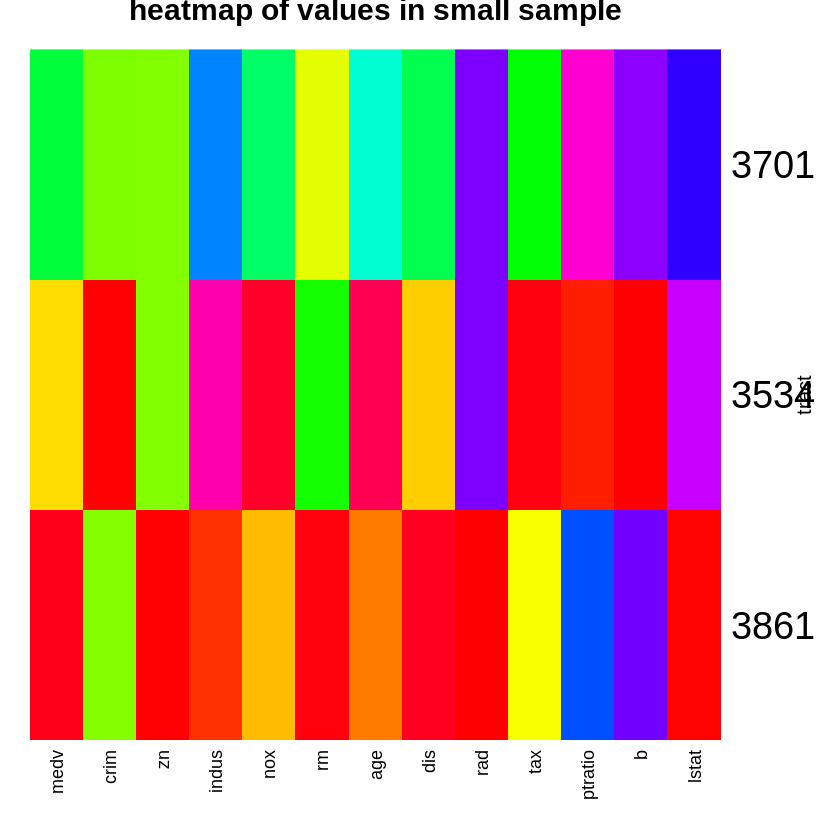

In [12]:
sample_matrix <- data.matrix(sample_num_feat)
heatmap(sample_matrix, Rowv = NA, Colv = NA, col = rainbow(512),
        scale = "column", main = "heatmap of values in small sample",
       ylab = "tract", labRow = rownames(sample_num_feat))

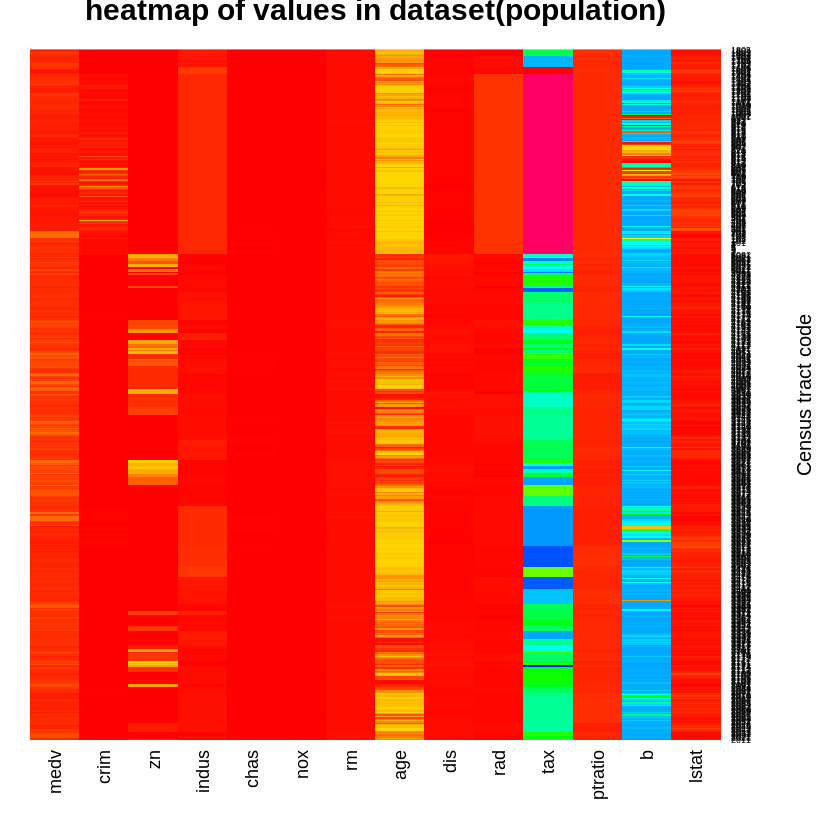

In [13]:
popn_matrix <- data.matrix(bh2_df)
heatmap(popn_matrix, Rowv = NA, Colv = NA, col = rainbow(512),
        scale = "none", main = "heatmap of values in dataset(population)",
        ylab = "Census tract code", labRow = rownames(bh2_df))

##### preparing a barplot of my samples and of the sample z-scores

In [14]:
# source(filename or URL) causes R to accept its input from the named file or URL or connection or expressions directly.
# multiplot.r is an R file that contains the definition of fn multiplot(). I could have also just pasted the code in multiplot.r
# in this nb and ran that code, but multiplot.r is a bit long. 
source('multiplot.r')

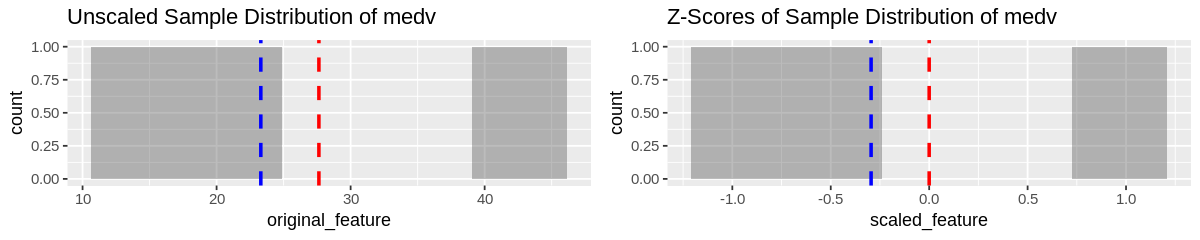

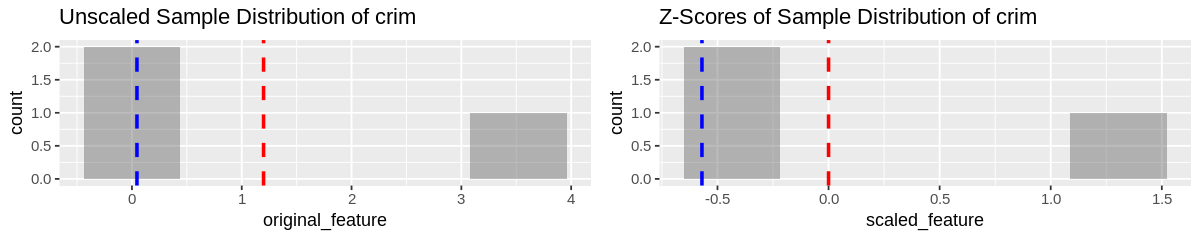

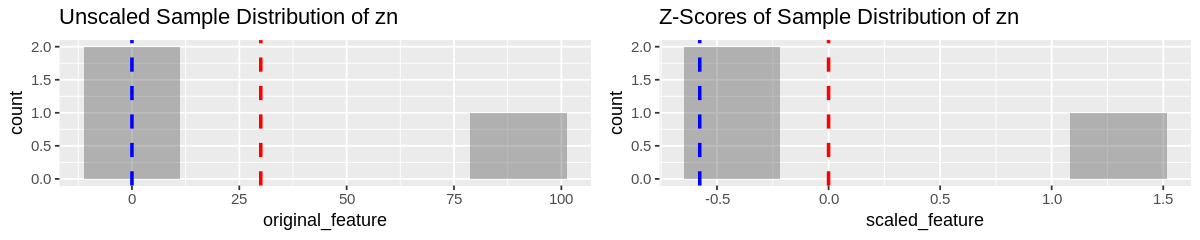

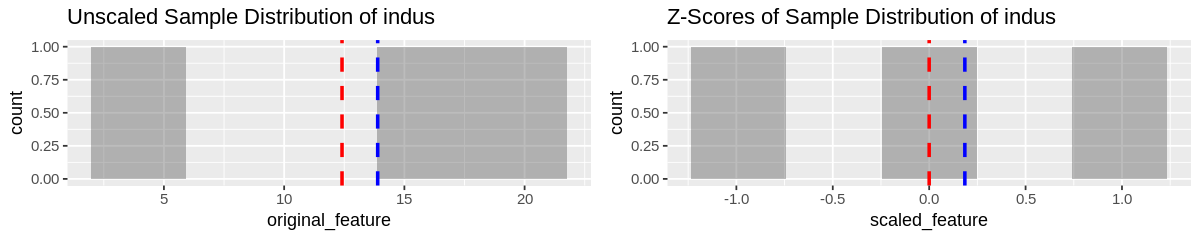

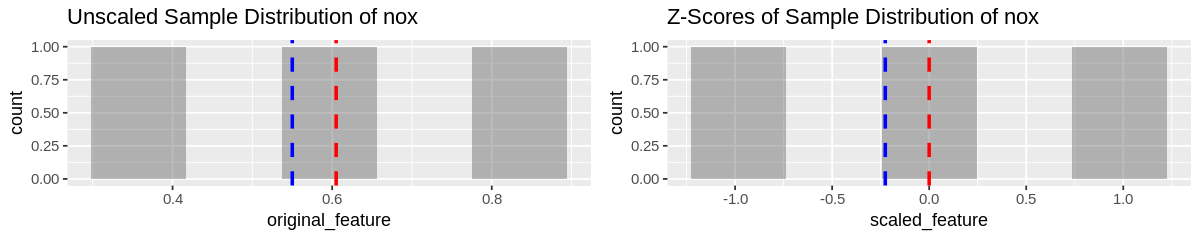

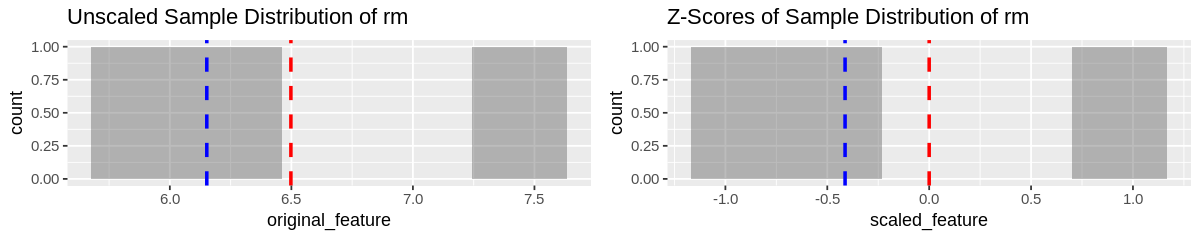

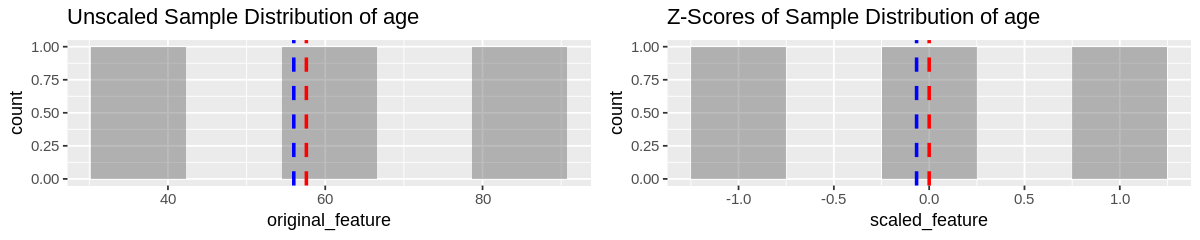

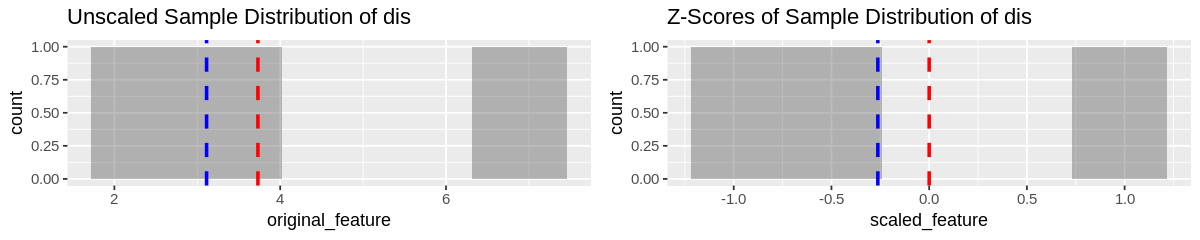

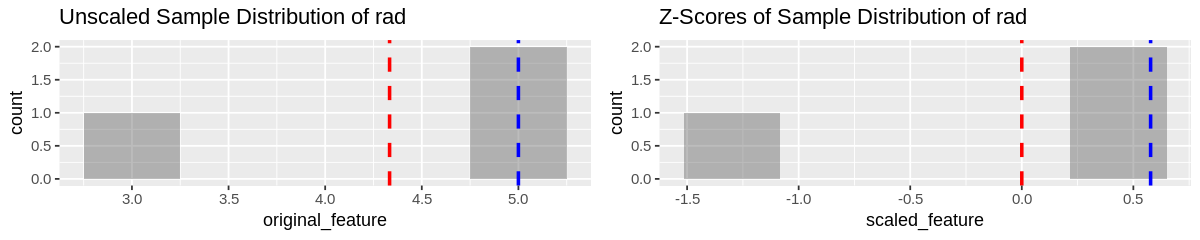

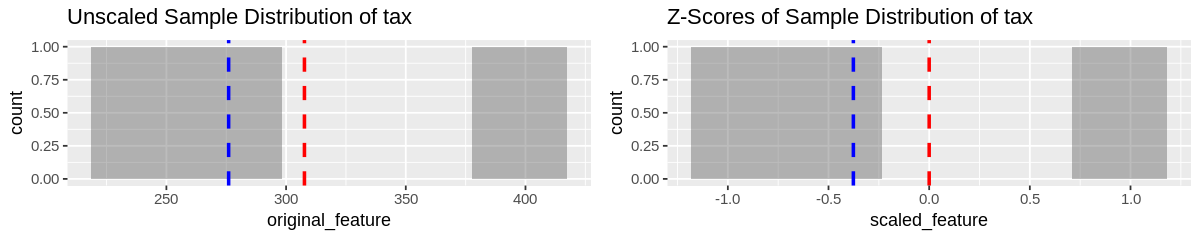

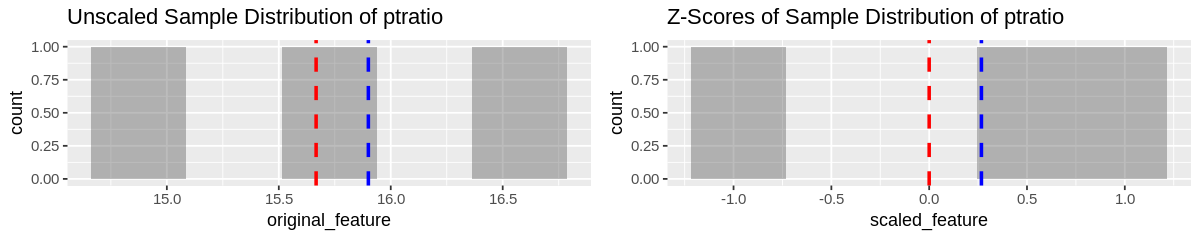

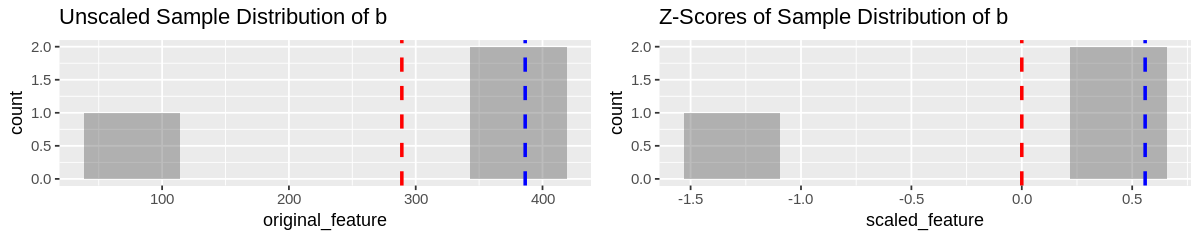

$medv
NULL

$crim
NULL

$zn
NULL

$indus
NULL

$nox
NULL

$rm
NULL

$age
NULL

$dis
NULL

$rad
NULL

$tax
NULL

$ptratio
NULL

$b
NULL

$lstat
NULL


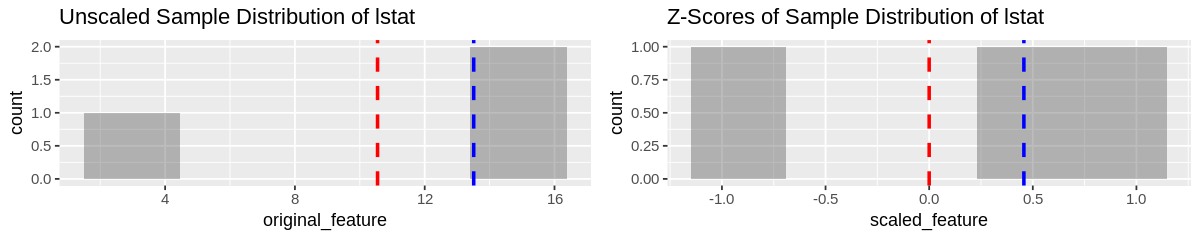

In [15]:
library(ggplot2)

original_v_scaled <- function (feature) {
    original_feature <- as.vector(sample_num_feat[[feature]])
    scaled_feature <- as.vector(sample_z[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=5, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Unscaled Sample Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=5, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Z-Scores of Sample Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}

library(repr)
options(repr.plot.width=10, repr.plot.height=2) 
# sapply(colnames(sample_num_feat), original_v_scaled) is equiv. to pseudocode:
# for (column_name in colnames(sample_num_feat)):
#     original_v_scaled(col_name)
sapply(colnames(sample_num_feat), original_v_scaled)

##### preparing a speculation as to what each sample might represent and discuss whether values across categories can be easily compared
Each sample is a randomly selected sample from the dataset with replacement. That means that in terms of Probability, the samples are independent and identically distributed. Thus, the Central Limit Theorem applies. We scale the sample and make them z-scores so that we can compare the spread of the sample distribution. 

#### Central Limit Thm
Assumptions:
    Let  
    1. S_n = X1 + X2 + ... + Xn  
    2. E[S_n] = nE[X1] = n(mu)  [X1, X2, ... , Xn are independent and identically distributed]  
    3. sd[S_n] = sqrt(n*var[X1]) = (sigma)*sqrt(mu)  
Therefore:
    (S_n - n(mu)) / [(sigma)sqrt(n)] => Normal(mean=0, sd = 1)
 